## File Introduction

This file creates pickle files for **training** the models that we made. All files inside the `training_datasets/` folder have been created from this notebook. Note that the files in `training_datasets/` are not the real training datasets but have been created for clarity of flie structure. You must delete them and run this notebook with the entire `lfw` dataset to get the entire training dataset.

This notebook writes the images as Numpy arrays into pickle files. However, if we write all the images at one go, the size of the pickle file blows up and sometimes the write fails. Hence, we write into the pickle files incrementally (six times, to be precise). This also means that while reading the pickle files, we will have to read them six times as well.

In [8]:
# all the imports
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from PIL import Image, ImageFilter, ImageDraw

## Original Images

In [11]:
original_images = []
new_w = new_h = 128

i = 0
for img_path in glob.iglob('lfw/*/*.jpg'):
    
    # this condition processes only 20 images: useful during development.
    # remove this condition before making the entire dataset
#     if i == 20:
#         break

    # Open image
    img = Image.open(img_path)
    
    # crop into only the center of the face (face is centered in the lfw dataset, so just crop into the center)
    w, h = img.size
    
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    
    img = img.crop((left, top, right, bottom))
    
    original_images.append(np.array(img))
    
    i += 1

original_images = np.array(original_images, dtype='float') / 255.0

17


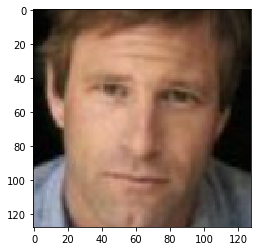

In [12]:
print(len(original_images))
plt.imshow(original_images[0])

In [13]:
part1 = original_images[:int(1/6*(len(original_images)))]
part2 = original_images[int(1/6*(len(original_images))):int(2/6*(len(original_images)))]
part3 = original_images[int(2/6*(len(original_images))):int(3/6*(len(original_images)))]
part4 = original_images[int(3/6*(len(original_images))):int(4/6*(len(original_images)))]
part5 = original_images[int(4/6*(len(original_images))):int(5/6*(len(original_images)))]
part6 = original_images[int(5/6*(len(original_images))):]

In [14]:
with open('../training_datasets/original.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('../training_datasets/original.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('../training_datasets/original.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('../training_datasets/original.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('../training_datasets/original.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('../training_datasets/original.pickle', 'ab') as f:
    pickle.dump(part6, f)

In [15]:
del original_images

## Pixelated Images

In [16]:
pixelated_images = []
DOWNSAMPLE_TO = 20
new_w = new_h = 128

i = 0
for img_path in glob.iglob('lfw/*/*.jpg'):
#     if i == 20:
#         break

    # Open image
    img = Image.open(img_path)
    
    # crop the image
    w, h = img.size
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    img = img.crop((left, top, right, bottom))
    
    # Resize smoothly down to small pixels using BILINEAR interpolation
    small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)
    
    # Scale back up using NEAREST to original size
    pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)
    
    del img

    pixelated_images.append(np.array(pixelated_img))
    
    i += 1

pixelated_images = np.array(pixelated_images, dtype='float') / 255.0

17


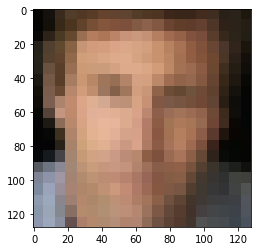

In [17]:
print(len(pixelated_images))
plt.imshow(pixelated_images[0])

In [18]:
part1 = pixelated_images[:int(1/6*(len(pixelated_images)))]
part2 = pixelated_images[int(1/6*(len(pixelated_images))):int(2/6*(len(pixelated_images)))]
part3 = pixelated_images[int(2/6*(len(pixelated_images))):int(3/6*(len(pixelated_images)))]
part4 = pixelated_images[int(3/6*(len(pixelated_images))):int(4/6*(len(pixelated_images)))]
part5 = pixelated_images[int(4/6*(len(pixelated_images))):int(5/6*(len(pixelated_images)))]
part6 = pixelated_images[int(5/6*(len(pixelated_images))):]

In [19]:
with open('../training_datasets/pixelated-20.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('../training_datasets/pixelated-20.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('../training_datasets/pixelated-20.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('../training_datasets/pixelated-20.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('../training_datasets/pixelated-20.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('../training_datasets/pixelated-20.pickle', 'ab') as f:
    pickle.dump(part6, f)

In [20]:
del pixelated_images

## Blurred Images

In [21]:
blurred_images = []
BLUR_INTENSITY = 4
new_w = new_h = 128

i = 0
for img_path in glob.iglob('lfw/*/*.jpg'):
#     if i == 20:
#         break

    # Open image
    img = Image.open(img_path)
    
    # crop the image
    w, h = img.size
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    img = img.crop((left, top, right, bottom))
    
    # Get the blurred image using Gaussian Blur
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_INTENSITY))
    
    del img
    
    blurred_images.append(np.array(blurred_img))
    
    i += 1

blurred_images = np.array(blurred_images, dtype='float') / 255.0

17


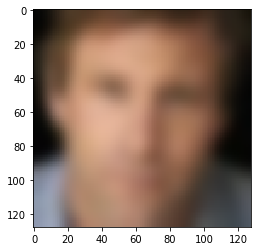

In [22]:
print(len(blurred_images))
plt.imshow(blurred_images[0])

In [23]:
part1 = blurred_images[:int(1/6*(len(blurred_images)))]
part2 = blurred_images[int(1/6*(len(blurred_images))):int(2/6*(len(blurred_images)))]
part3 = blurred_images[int(2/6*(len(blurred_images))):int(3/6*(len(blurred_images)))]
part4 = blurred_images[int(3/6*(len(blurred_images))):int(4/6*(len(blurred_images)))]
part5 = blurred_images[int(4/6*(len(blurred_images))):int(5/6*(len(blurred_images)))]
part6 = blurred_images[int(5/6*(len(blurred_images))):]

In [24]:
with open('../training_datasets/blurred-4.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('../training_datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('../training_datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('../training_datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('../training_datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('../training_datasets/blurred-4.pickle', 'ab') as f:
    pickle.dump(part6, f)

In [25]:
del blurred_images

## Blocked Images

In [32]:
# code to check overlap - https://codereview.stackexchange.com/questions/31352/overlapping-rectangles

class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Rect(object):
    def __init__(self, p1, p2):
        '''Store the top, bottom, left and right values for points 
               p1 and p2 are the (corners) in either order
        '''
        self.left   = min(p1.x, p2.x)
        self.right  = max(p1.x, p2.x)
        self.bottom = min(p1.y, p2.y)
        self.top    = max(p1.y, p2.y)

def overlap(r1, r2):
    '''Overlapping rectangles overlap both horizontally & vertically
    '''
    return range_overlap(r1.left, r1.right, r2.left, r2.right) and range_overlap(r1.bottom, r1.top, r2.bottom, r2.top)

def range_overlap(a_min, a_max, b_min, b_max):
    '''Neither range is completely greater than the other
    '''
    return (a_min <= b_max) and (b_min <= a_max)

In [33]:
import random

blocked_images = []
new_w = new_h = 128
box_size = 40

i = 0
for img_path in glob.iglob('lfw/*/*.jpg'):
#     if i == 20:
#         break

    # Open image
    img = Image.open(img_path)
    
    w, h = img.size
    
    left = (w - new_w)//2
    top = (h - new_h)//2
    right = (w + new_w)//2
    bottom = (h + new_h)//2
    
    img = img.crop((left, top, right, bottom))
    
    draw = ImageDraw.Draw(img)
    
    overlapping = True
    
    while (overlapping):
        # generate coordinates for first box
        p1 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
        p2 = Point(p1.x + box_size, p1.y + box_size)
        r1 = Rect(p1, p2)
        
        # generate coordinates for second box
        p3 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
        p4 = Point(p3.x + box_size, p3.y + box_size)
        r2 = Rect(p3, p4)
        
        overlapping = overlap(r1, r2)
    
    draw.rectangle(((r2.left, r2.top), (r2.right, r2.bottom)), fill="black")
    draw.rectangle(((r1.left, r1.top), (r1.right, r1.bottom)), fill="black")
    
    # this line of code draws a box in the very center of the image. Comment the above and uncomment this if you want to draw a box there.
#     draw.rectangle((((128 - box_size) // 2, (128 - box_size) // 2), ((128 + box_size) // 2, (128 + box_size) // 2)), fill="black")

    blocked_images.append(np.array(img))
    
    i += 1

blocked_images = np.array(blocked_images, dtype='float') / 255.0

17


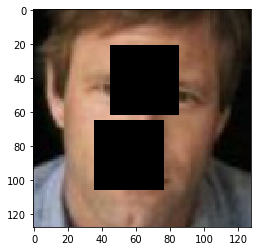

In [34]:
print(len(blocked_images))
plt.imshow(blocked_images[0])

In [35]:
part1 = blocked_images[:int(1/6*(len(blocked_images)))]
part2 = blocked_images[int(1/6*(len(blocked_images))):int(2/6*(len(blocked_images)))]
part3 = blocked_images[int(2/6*(len(blocked_images))):int(3/6*(len(blocked_images)))]
part4 = blocked_images[int(3/6*(len(blocked_images))):int(4/6*(len(blocked_images)))]
part5 = blocked_images[int(4/6*(len(blocked_images))):int(5/6*(len(blocked_images)))]
part6 = blocked_images[int(5/6*(len(blocked_images))):]

In [36]:
with open('../training_datasets/blocked-40.pickle', 'wb') as f:
    pickle.dump(part1, f)
with open('../training_datasets/blocked-40.pickle', 'ab') as f:
    pickle.dump(part2, f)
with open('../training_datasets/blocked-40.pickle', 'ab') as f:
    pickle.dump(part3, f)
with open('../training_datasets/blocked-40.pickle', 'ab') as f:
    pickle.dump(part4, f)
with open('../training_datasets/blocked-40.pickle', 'ab') as f:
    pickle.dump(part5, f)
with open('../training_datasets/blocked-40.pickle', 'ab') as f:
    pickle.dump(part6, f)

In [37]:
del blocked_images